<a href="https://colab.research.google.com/github/Rtniewi/kcwiertniewicz-IDS/blob/main/Problem1_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

//***Katrina Cwiertniewicz
//*** CSC 330
//9/26/2024
//Assignment 2: CNN Model
####The purpose of this assignment is to compare the performance of a simple Multi_Layer Perceptron (MLP) and a Convolutional Neural Network (CNN) using strides of the CIFAR-10 dataset.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets

In [ ]:
NUM_CLASSES = 10

## 1. Prepare the Data <a name="prepare"></a>
CIFAR-10 dataset is loaded and normalized by dividing by 255.0.

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

## 2. Build the Model <a name="build"></a>
The model includes Conv2D, BatchNomalization, ReLU, Flatten, Dense, and Dropout layers.


In [ ]:
def create_cnn_model(input_shape):
  #######################################################################
  # The input layer
  # This is the shape of the CIFAR-10 images (32x32 pixels with 3 color channels)
  input_shape = layers.Input((32, 32, 3))
  #######################################################################

  #######################################################################
  # The first COV2D layer
  #######################################################################
  # Output shape: (32, 32, 32)
  #     32 filters, 3x3 kernel size, stride of 1, and same padding.
  #     The spatial dimensions remain the same (32x32), but the depth increases to 32.
  x = layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same")(
      input_shape
  )
  x = layers.BatchNormalization()(x)
  x = layers.ReLU()(x)

  #######################################################################
  # The second COV2D layer
  #######################################################################
  # Output shape: (16, 16, 32)
  #      32 filters, 3x3 kernel size, stride of 2, and same padding.
  #      With a stride of 2, the filter moves 2 pixels at a time, effectively
  #      halving the spatial dimensions of the input.
  x = layers.Conv2D(filters=32, kernel_size=3, strides=2, padding="same")(x)
  x = layers.BatchNormalization()(x)
  x = layers.ReLU()(x)


  #######################################################################
  # The third COV2D layer
  # Output shape: (16, 16, 64)
  #      64 filters, 3x3 kernel size, stride of 1, and same padding.
  #      The spatial dimensions remain the same, but the depth increases to 64.
  #######################################################################
  x = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(x)
  x = layers.BatchNormalization()(x)
  x = layers.ReLU()(x)


  #######################################################################
  # The fourth COV2D layer
  # Output shape: (8, 8, 64)
  #        64 filters, 3x3 kernel size, stride of 2, and same padding.
  #        The spatial dimensions are reduced by half again.
  #######################################################################
  x = layers.Conv2D(filters=64, kernel_size=3, strides=2, padding="same")(x)
  x = layers.BatchNormalization()(x)
  x = layers.ReLU()(x)


  #######################################################################
  #  Output shape: (4096)
  #  Flattens the 8x8x64 tensor into a 4096-dimensional vector.

  x = layers.Flatten()(x)
  #######################################################################


  #######################################################################
  # Output shape: (128)
  # Fully connected layer with 128 units

  x = layers.Dense(128)(x)
  x = layers.BatchNormalization()(x)
  x = layers.ReLU()(x)
  x = layers.Dropout(rate=0.5)(x)


  #######################################################################
  x = layers.Dense(NUM_CLASSES)(x)
  output_layer = layers.Activation("softmax")(x)

  #######################################################################
  model = models.Model(input_shape, output_layer)

  model.summary()

## 3. Train the model <a name="train"></a>
The model is compiled with an optimizer (adam) and loss function (sparse_categorical_crossentropy).

In [ ]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

The MLP model is trained using the fit method and validation split of 20% to help prevent overfitting.

In [ ]:
model_evaluation = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True,
    validation_data=(x_test, y_test),
    validation_split=0.2,
)

Epoch 1/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.2599 - accuracy: 0.9067 - val_loss: 1.6310 - val_accuracy: 0.6502
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.2442 - accuracy: 0.9141 - val_loss: 0.9219 - val_accuracy: 0.7463
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.2305 - accuracy: 0.9187 - val_loss: 1.0384 - val_accuracy: 0.7259
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.2196 - accuracy: 0.9223 - val_loss: 0.9516 - val_accuracy: 0.7483
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.2089 - accuracy: 0.9248 - val_loss: 0.9694 - val_accuracy: 0.7445
Epoch 6/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.2078 - accuracy: 0.9266 - val_loss: 0.9673 - val_accuracy: 0.7499
Epoch 7/10
1563/1563 [==============================] - 34s 21ms/step - loss: 0.1975 - accuracy: 0.9284 - val_loss: 1.2051 -

## 4. Evaluation <a name="evaluate"></a>

In [ ]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 1s 86ms/step - loss: 1.0156 - accuracy: 0.7504


[1.0156488418579102, 0.7504000067710876]

## 5. Plotting Results <a name="evaluate"></a>
Plotted CNN training accuracy and validation accuracy.

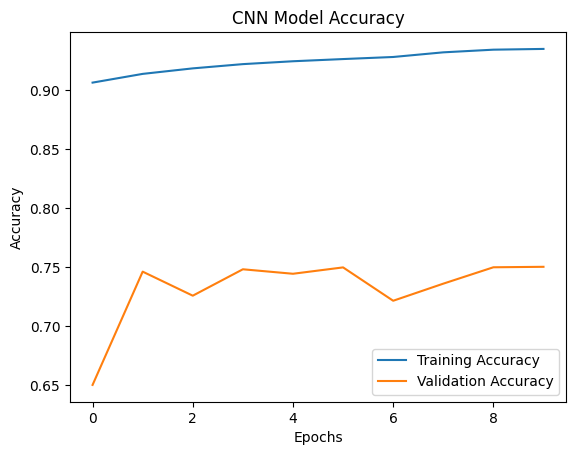

In [ ]:
plt.plot(model_evaluation.history['accuracy'], label = 'Training Accuracy')
plt.plot(model_evaluation.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()